In [2]:
! pip install nltk
! pip install matplotlib
! pip install seaborn
! pip install textblob


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 740.3 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 531.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\karti\AppData\Local\Temp\ipykernel_18096\2127427467.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')


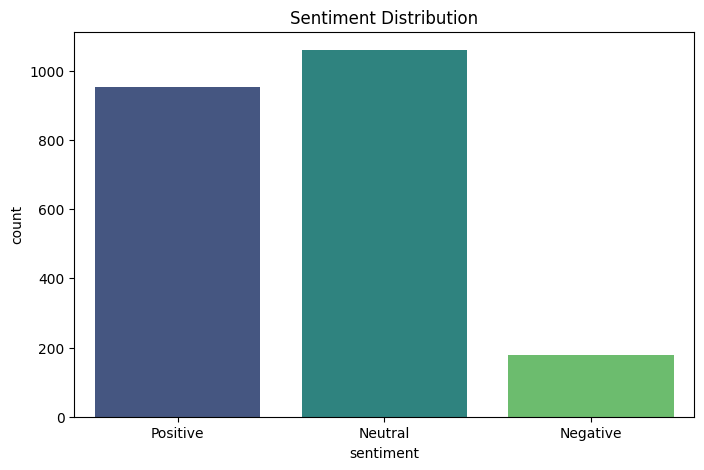

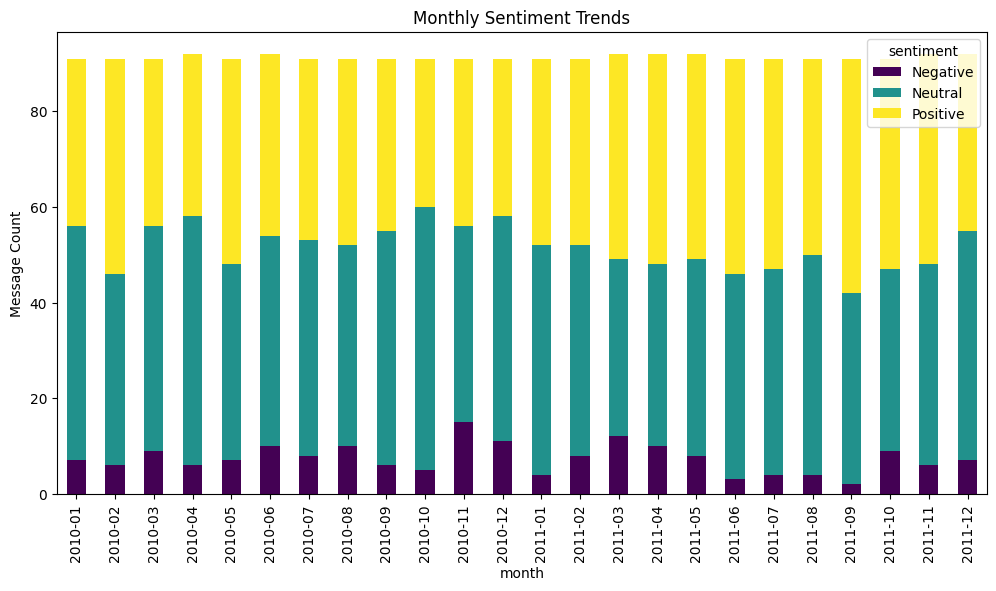

 Top 3 Positive Employees Each Month:
                            from    month  score
168     patti.thompson@enron.com  2010-01      5
24        don.baughman@enron.com  2010-01      4
48           eric.bass@enron.com  2010-01      4
1    bobette.riner@ipgdirect.com  2010-02      7
73         john.arnold@enron.com  2010-02      7
..                           ...      ...    ...
142      kayne.coulter@enron.com  2011-11      7
22   bobette.riner@ipgdirect.com  2011-11      6
143      kayne.coulter@enron.com  2011-12      5
191     patti.thompson@enron.com  2011-12      5
71           eric.bass@enron.com  2011-12      4

[72 rows x 3 columns]
 Top 3 Negative Employees Each Month:
                            from    month  score
192      rhonda.denton@enron.com  2010-01      0
96       johnny.palmer@enron.com  2010-01      1
0    bobette.riner@ipgdirect.com  2010-01      2
145      lydia.delgado@enron.com  2010-02      1
169     patti.thompson@enron.com  2010-02      1
..                 

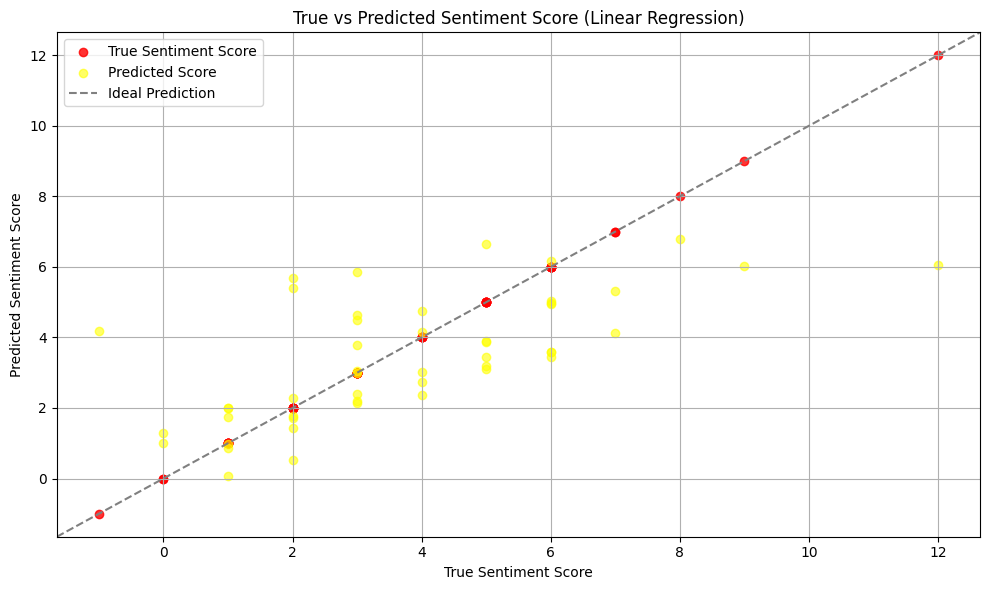

In [2]:
# Employee Sentiment Analysis - Jupyter Notebook
# Author: Your Name
# Date: YYYY-MM-DD

# ======================================
#  SECTION 1: Setup and Initial Loading
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import datetime

from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("test.csv", encoding='utf-8')
df.columns = ["subject", "body", "date", "from"]  # Rename columns

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.dropna(subset=["date"], inplace=True)  # Remove invalid dates

df.head()

# ======================================
#  SECTION 2: Sentiment Labeling
# ======================================
def clean_text(text):                                  # cleaning 
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_body"] = df["body"].apply(clean_text)

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity         # text blob is used for sentiment labelling using predefined rules and dictionery to label
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_body"].apply(get_sentiment)
df.head()

# ======================================
#  SECTION 3: Exploratory Data Analysis (EDA)
# ======================================
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

df["month"] = df["date"].dt.to_period("M")

# Sentiment trend by month
monthly_sentiment = df.groupby(["month", "sentiment"]).size().unstack().fillna(0)
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Monthly Sentiment Trends")
plt.ylabel("Message Count")
plt.show()

# ======================================
#  SECTION 4: Employee Score Calculation
# ======================================
sentiment_score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["score"] = df["sentiment"].map(sentiment_score_map)

df["month"] = df["date"].dt.to_period("M")
monthly_scores = df.groupby(["from", "month"])["score"].sum().reset_index()
monthly_scores.head()

# ======================================
#  SECTION 5: Employee Ranking
# ======================================
def get_top_employees(score_df, n=3):
    top_pos = score_df.sort_values(["month", "score", "from"], ascending=[True, False, True])
    top_neg = score_df.sort_values(["month", "score", "from"], ascending=[True, True, True])
    top3_pos = top_pos.groupby("month").head(n)
    top3_neg = top_neg.groupby("month").head(n)
    return top3_pos, top3_neg

top3_positive, top3_negative = get_top_employees(monthly_scores)

print(" Top 3 Positive Employees Each Month:")
print(top3_positive)

print(" Top 3 Negative Employees Each Month:")
print(top3_negative)

# ======================================
#  SECTION 6: Flight Risk Identification
# ======================================
df["date_only"] = df["date"].dt.date
negatives_only = df[df["sentiment"] == "Negative"]

# Rolling 30-day flight risk detection
flight_risks = []

for employee, group in negatives_only.groupby("from"):
    dates = sorted(group["date_only"])
    for i in range(len(dates)):
        count = sum((dates[j] - dates[i]).days <= 30 for j in range(i, len(dates)))
        if count >= 4:
            flight_risks.append(employee)
            break

flight_risks = list(set(flight_risks))
print(" Employees At Flight Risk:", flight_risks)

# ======================================
#  SECTION 7: Predictive Modeling (Linear Regression)
# ======================================
# Features: msg length, word count, month-wise frequency
df["msg_length"] = df["clean_body"].apply(len)
df["word_count"] = df["clean_body"].apply(lambda x: len(x.split()))
msg_freq = df.groupby(["from", "month"]).size().reset_index(name="msg_count")

merged = pd.merge(monthly_scores, msg_freq, on=["from", "month"], how="left")
merged = pd.merge(merged, df.groupby(["from", "month"]).agg({
    "msg_length": "mean",
    "word_count": "mean"
}).reset_index(), on=["from", "month"], how="left")

# Modeling
X = merged[["msg_count", "msg_length", "word_count"]]
y = merged["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📈 MSE:", mean_squared_error(y_test, y_pred))
print("📊 R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(10, 6))

# Red dots: Ground truth (True Score) vs itself (diagonal reference)
plt.scatter(y_test, y_test, color='red', label='True Sentiment Score', alpha=0.8)

# Yellow dots: Ground truth (x) vs predicted score (y)
plt.scatter(y_test, y_pred, color='yellow', label='Predicted Score', alpha=0.6)

plt.xlabel("True Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("True vs Predicted Sentiment Score (Linear Regression)")
plt.axline((min(y_test), min(y_test)), slope=1, color='gray', linestyle='--', label='Ideal Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# ======================================
#  SECTION 8: Export Results (Optional)
# ======================================
# Save top employees, flight risks, etc.
top3_positive.to_csv("top_positive_employees.csv", index=False)
top3_negative.to_csv("top_negative_employees.csv", index=False)
pd.DataFrame(flight_risks, columns=["flight_risk_employee"]).to_csv("flight_risks.csv", index=False)
